In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import io
import cv2
from sklearn.model_selection import train_test_split
import glob
from keras.models import Sequential
from keras.layers import Conv2D,Conv3D
from keras.layers import MaxPool2D,AvgPool2D,BatchNormalization
from keras.layers import Flatten,LeakyReLU
from keras.layers import Dense,Dropout
import keras
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras import backend as K


Using TensorFlow backend.


In [2]:
df=pd.read_csv('test.csv')

In [3]:
df.head()

,image_name,x1,x2,y1,y2
0,1467891670691DSC_0582.png,NaN,NaN,NaN,NaN
1,1475151786691DSC00560.png,NaN,NaN,NaN,NaN
2,1480334114405_R2A3620.png,NaN,NaN,NaN,NaN
3,JPEG_20160712_161047_1000606860114.png,NaN,NaN,NaN,NaN
4,JPEG_20160403_174522_-1137349501.png,NaN,NaN,NaN,NaN


In [56]:
df['combine'] = df[['x1', 'x2','y1','y2']].values.tolist()
df.head()


,image_name,x1,x2,y1,y2,combine
0,1467891670691DSC_0582.png,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan]"
1,1475151786691DSC00560.png,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan]"
2,1480334114405_R2A3620.png,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan]"
3,JPEG_20160712_161047_1000606860114.png,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan]"
4,JPEG_20160403_174522_-1137349501.png,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan]"


In [57]:
train_img_list = glob.glob("images/*")

In [14]:
with open('data.txt', 'rb') as f:
    my_loaded_array = np.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data.txt'

In [16]:
my_loaded_array

array([[[[0.56862745, 0.60784314, 0.55686275],
         [0.57647059, 0.61176471, 0.56078431],
         [0.58823529, 0.61960784, 0.57647059],
         ...,
         [0.59215686, 0.63137255, 0.58431373],
         [0.58039216, 0.62745098, 0.58039216],
         [0.57647059, 0.62352941, 0.57647059]],

        [[0.56862745, 0.60784314, 0.55686275],
         [0.57254902, 0.61176471, 0.56078431],
         [0.58823529, 0.61960784, 0.57647059],
         ...,
         [0.58431373, 0.62745098, 0.58039216],
         [0.57647059, 0.62352941, 0.57647059],
         [0.57647059, 0.62352941, 0.57647059]],

        [[0.57647059, 0.61568627, 0.56862745],
         [0.58431373, 0.62352941, 0.57254902],
         [0.58431373, 0.62352941, 0.57647059],
         ...,
         [0.58431373, 0.62745098, 0.58823529],
         [0.58039216, 0.62745098, 0.58039216],
         [0.57647059, 0.61960784, 0.58039216]],

        ...,

        [[0.58039216, 0.61960784, 0.55686275],
         [0.58431373, 0.62352941, 0.57254902]

In [7]:
import scipy.misc
from skimage import feature
from scipy import misc
from PIL import Image
from skimage import color
edges=[]



label=[]
data=[]
i=0
for imagePath in df['image_name'].values:
    imgn='images\\'+ imagePath
    if imgn in train_img_list :
        image = cv2.imread(imgn)
        imgne=np.array(image)
        #imgnew=imgne.flatten().reshape(1,480*640*3)
        image = cv2.resize(image, (120,160))
        #dat=(rgb.convert('1',dither=Image.NONE))
        img = color.rgb2gray(image)
        data.append(cv2.canny(img, sigma=2))
        #data.append(np.array(dat))
        print(image.shape)
        i=1+i
        label.append(imagePath)

SyntaxError: invalid syntax (<ipython-input-7-d15625eda39b>, line 2)

In [59]:
d=np.array(data)/255


In [60]:

d.shape

(24045, 28, 28)

In [61]:
d=d.reshape(-1,28,28,1)

In [62]:
d.shape

(24045, 28, 28, 1)

In [63]:
with open('data_28_grey_out.txt', 'wb') as f:
    np.save(f, d, allow_pickle=False)

In [332]:
with open('data.txt', 'rb') as f:
    my_loaded_array = np.load(f)

In [334]:
my_loaded_array.shape

(14000, 48, 64, 3)

In [18]:
d.shape

(24045, 60, 80, 3)

0                                                      ...
1                                                      ...
2                                                      ...
3                                                      ...
4                                                      ...
5                                                      ...
6                                                      ...
7                                                      ...
8                                                      ...
9                                                      ...
10                                                     ...
11                                                     ...
12                                                     ...
13                                                     ...
14                                                     ...
15                                                     ...
16                                                     .

In [280]:
df.to_csv('datain.csv')

In [8]:
Y_train=df.iloc[:,1:5]


In [9]:
Y_train=df.iloc[:,1:5]
Y_train['centerx']=(Y_train['x1']+Y_train['x2'])/2
Y_train['centery']=(Y_train['y1']+Y_train['y2'])/2
Y_train['width']=(Y_train['x2']-Y_train['x1'])
Y_train['height']=(Y_train['y2']-Y_train['y1'])

In [10]:
Y_train=Y_train.drop(['x1','x2','y1','y2'],axis=1)


In [11]:

Y_train.head()
Y=df.iloc[:,:]

In [12]:
Y_train.head()

,centerx,centery,width,height
0,305.0,234.0,380,182
1,240.0,235.0,434,348
2,319.0,241.5,564,457
3,314.5,273.5,575,223
4,323.0,249.5,526,151


In [269]:
def mean_iou(y_true, y_pred):
   score, up_opt = tf.metrics.mean_iou(y_true, y_pred,num_classes=2)
   K.get_session().run(tf.local_variables_initializer())
   with tf.control_dependencies([up_opt]):
       score = tf.identity(score)
   return score

In [ ]:
with open('data.txt', 'wb') as f:
    np.save(f, my_array, allow_pickle=False)

In [17]:
(trainX, valX, trainY, valY) = train_test_split(my_loaded_array,Y_train, test_size=0.001)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1), padding='same',  input_shape=[48,64,3],use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(64, kernel_size=(2,2),strides=(1,1), padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1), padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128, kernel_size=(3,3),strides=(1,1), padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(AvgPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3),strides=(1,1), padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(2,2),strides=(1,1), padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(4))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 64, 32)        864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 64, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 21, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 21, 64)        8192      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 21, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 21, 64)        0         
__________

In [21]:
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
 
model.fit(trainX, trainY, batch_size=30,validation_data=(valX, valY), epochs=10, verbose=1)

Train on 13986 samples, validate on 14 samples
Epoch 1/10
   30/13986 [..............................] - ETA: 3:13:36 - loss: 109444.3438 - acc: 0.2333

KeyboardInterrupt: 

In [ ]:
model_json_cxy2 = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json_cxy2)
# serialize weights to HDF5
model.save_weights("model_cxy2.h5")
print("Saved model to disk")

In [ ]:
model.fit(trainX, trainY.drop(['height','width'],axis=1), batch_size=50,validation_data=(valX, valY.drop(['height','width'],axis=1)) , epochs=20, verbose=1)

In [ ]:
model_json_grey = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json_grey)
# serialize weights to HDF5
model.save_weights("model_grey.h5")
print("Saved model to disk")

In [300]:
from keras.models import model_from_json

json_file = open('model_my_hw_48_64_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_my_hw_48_64_3.h5")
print("Loaded model from disk")
 


Loaded model from disk


In [297]:
loaded_model.compile(loss=keras.losses.MSE,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [75]:
model.fit(trainX, trainY.drop(['centerx','centery'],axis=1), batch_size=30,validation_data=(valX, valY.drop(['centerx','centery'],axis=1)) , epochs=100, verbose=1)

Train on 13300 samples, validate on 700 samples
Epoch 1/100
  840/13300 [>.............................] - ETA: 3:26 - loss: 127.3175 - acc: 0.7024

KeyboardInterrupt: 

In [214]:
model = Sequential()
model.add(Conv2D(2, kernel_size=(3,3), activation='relu',  input_shape=[48,64,3]))
model.add(Conv2D(4, kernel_size=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(1, kernel_size=(2,2), activation='relu'))
#model.add(Conv2D(1, kernel_size=(3,3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
##model.add(Dropout(0.3))
model.add(Flatten())
#model.add(Dense(32, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
#model.add(LeakReLU(0.1))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 46, 62, 2)         56        
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 46, 62, 4)         12        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 23, 31, 4)         0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 23, 31, 4)         0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 2852)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 2853      
Total params: 2,921
Trainable params: 2,921
Non-trainable params: 0
_________________________________________________________________


In [215]:
model.compile(loss=keras.losses.mae,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
 
model.fit(trainX, trainY.drop(['centerx','centery','height'],axis=1), batch_size=30,validation_data=(valX, valY.drop(['height','centerx','centery'],axis=1)) , epochs=50, verbose=1)

Train on 13930 samples, validate on 70 samples
Epoch 1/50
13930/13930 [==============================] - 47s 3ms/step - loss: 145.4723 - acc: 0.0024 - val_loss: 121.2357 - val_acc: 0.0000e+00
Epoch 2/50
13930/13930 [==============================] - 39s 3ms/step - loss: 108.2632 - acc: 0.0030 - val_loss: 110.7657 - val_acc: 0.0000e+00
Epoch 3/50
 8430/13930 [=================>............] - ETA: 15s - loss: 99.4703 - acc: 0.0040

KeyboardInterrupt: 

In [114]:
model.fit(trainX, trainY.drop(['centerx','centery'],axis=1), batch_size=200 , epochs=50, verbose=1)

Epoch 1/50
14000/14000 [==============================] - 8s 597us/step - loss: 19.4004 - acc: 0.9565
Epoch 2/50
14000/14000 [==============================] - 8s 598us/step - loss: 19.2186 - acc: 0.9541
Epoch 3/50
14000/14000 [==============================] - 8s 601us/step - loss: 19.0825 - acc: 0.9547
Epoch 4/50
14000/14000 [==============================] - 9s 620us/step - loss: 19.1397 - acc: 0.9535
Epoch 5/50
14000/14000 [==============================] - 9s 619us/step - loss: 19.3434 - acc: 0.9525
Epoch 6/50
14000/14000 [==============================] - 9s 621us/step - loss: 19.3564 - acc: 0.9527
Epoch 7/50
14000/14000 [==============================] - 9s 620us/step - loss: 19.1684 - acc: 0.9536
Epoch 8/50
14000/14000 [==============================] - 9s 620us/step - loss: 19.0883 - acc: 0.9559
Epoch 9/50
14000/14000 [==============================] - 9s 622us/step - loss: 19.0837 - acc: 0.9518
Epoch 10/50
14000/14000 [==============================] - 9s 622us/step - loss: 1

In [115]:
model_json_my_hw = model.to_json()
with open("model_my_hw_48_64_3.json", "w") as json_file:
    json_file.write(model_json_my_hw)
# serialize weights to HDF5
model.save_weights("model_my_hw_48_64_3.h5")
print("Saved model to disk")

Saved model to disk


In [79]:
model_json_hw2 = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json_hw2)
# serialize weights to HDF5
model1.save_weights("model_hw2.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
output=pd.read_csv('test.csv')

In [40]:
output.shape

(12815, 5)

In [41]:
label_out=[]
data_out=[]

for imagePath in output['image_name'].values:
    imgn='images\\'+ imagePath
    if imgn in train_img_list :
        image = cv2.imread(imgn)
        imgne=np.array(image)
        #imgnew=imgne.flatten().reshape(1,480*640*3)
        image = cv2.resize(image, (80,60))
        #blur = cv2.GaussianBlur(image,(5,5),0)
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #gray=gray.resize(gray,(160,120))
        print(image.shape,i)
        i=1+i
        data_out.append(image)
        label_out.append(imagePath)

(60, 80, 3) 14000
(60, 80, 3) 14001
(60, 80, 3) 14002
(60, 80, 3) 14003
(60, 80, 3) 14004
(60, 80, 3) 14005
(60, 80, 3) 14006
(60, 80, 3) 14007
(60, 80, 3) 14008
(60, 80, 3) 14009
(60, 80, 3) 14010
(60, 80, 3) 14011
(60, 80, 3) 14012
(60, 80, 3) 14013
(60, 80, 3) 14014
(60, 80, 3) 14015
(60, 80, 3) 14016
(60, 80, 3) 14017
(60, 80, 3) 14018
(60, 80, 3) 14019
(60, 80, 3) 14020
(60, 80, 3) 14021
(60, 80, 3) 14022
(60, 80, 3) 14023
(60, 80, 3) 14024
(60, 80, 3) 14025
(60, 80, 3) 14026
(60, 80, 3) 14027
(60, 80, 3) 14028
(60, 80, 3) 14029
(60, 80, 3) 14030
(60, 80, 3) 14031
(60, 80, 3) 14032
(60, 80, 3) 14033
(60, 80, 3) 14034
(60, 80, 3) 14035
(60, 80, 3) 14036
(60, 80, 3) 14037
(60, 80, 3) 14038
(60, 80, 3) 14039
(60, 80, 3) 14040
(60, 80, 3) 14041
(60, 80, 3) 14042
(60, 80, 3) 14043
(60, 80, 3) 14044
(60, 80, 3) 14045
(60, 80, 3) 14046
(60, 80, 3) 14047
(60, 80, 3) 14048
(60, 80, 3) 14049
(60, 80, 3) 14050
(60, 80, 3) 14051
(60, 80, 3) 14052
(60, 80, 3) 14053
(60, 80, 3) 14054
(60, 80, 3

(60, 80, 3) 14459
(60, 80, 3) 14460
(60, 80, 3) 14461
(60, 80, 3) 14462
(60, 80, 3) 14463
(60, 80, 3) 14464
(60, 80, 3) 14465
(60, 80, 3) 14466
(60, 80, 3) 14467
(60, 80, 3) 14468
(60, 80, 3) 14469
(60, 80, 3) 14470
(60, 80, 3) 14471
(60, 80, 3) 14472
(60, 80, 3) 14473
(60, 80, 3) 14474
(60, 80, 3) 14475
(60, 80, 3) 14476
(60, 80, 3) 14477
(60, 80, 3) 14478
(60, 80, 3) 14479
(60, 80, 3) 14480
(60, 80, 3) 14481
(60, 80, 3) 14482
(60, 80, 3) 14483
(60, 80, 3) 14484
(60, 80, 3) 14485
(60, 80, 3) 14486
(60, 80, 3) 14487
(60, 80, 3) 14488
(60, 80, 3) 14489
(60, 80, 3) 14490
(60, 80, 3) 14491
(60, 80, 3) 14492
(60, 80, 3) 14493
(60, 80, 3) 14494
(60, 80, 3) 14495
(60, 80, 3) 14496
(60, 80, 3) 14497
(60, 80, 3) 14498
(60, 80, 3) 14499
(60, 80, 3) 14500
(60, 80, 3) 14501
(60, 80, 3) 14502
(60, 80, 3) 14503
(60, 80, 3) 14504
(60, 80, 3) 14505
(60, 80, 3) 14506
(60, 80, 3) 14507
(60, 80, 3) 14508
(60, 80, 3) 14509
(60, 80, 3) 14510
(60, 80, 3) 14511
(60, 80, 3) 14512
(60, 80, 3) 14513
(60, 80, 3

(60, 80, 3) 14931
(60, 80, 3) 14932
(60, 80, 3) 14933
(60, 80, 3) 14934
(60, 80, 3) 14935
(60, 80, 3) 14936
(60, 80, 3) 14937
(60, 80, 3) 14938
(60, 80, 3) 14939
(60, 80, 3) 14940
(60, 80, 3) 14941
(60, 80, 3) 14942
(60, 80, 3) 14943
(60, 80, 3) 14944
(60, 80, 3) 14945
(60, 80, 3) 14946
(60, 80, 3) 14947
(60, 80, 3) 14948
(60, 80, 3) 14949
(60, 80, 3) 14950
(60, 80, 3) 14951
(60, 80, 3) 14952
(60, 80, 3) 14953
(60, 80, 3) 14954
(60, 80, 3) 14955
(60, 80, 3) 14956
(60, 80, 3) 14957
(60, 80, 3) 14958
(60, 80, 3) 14959
(60, 80, 3) 14960
(60, 80, 3) 14961
(60, 80, 3) 14962
(60, 80, 3) 14963
(60, 80, 3) 14964
(60, 80, 3) 14965
(60, 80, 3) 14966
(60, 80, 3) 14967
(60, 80, 3) 14968
(60, 80, 3) 14969
(60, 80, 3) 14970
(60, 80, 3) 14971
(60, 80, 3) 14972
(60, 80, 3) 14973
(60, 80, 3) 14974
(60, 80, 3) 14975
(60, 80, 3) 14976
(60, 80, 3) 14977
(60, 80, 3) 14978
(60, 80, 3) 14979
(60, 80, 3) 14980
(60, 80, 3) 14981
(60, 80, 3) 14982
(60, 80, 3) 14983
(60, 80, 3) 14984
(60, 80, 3) 14985
(60, 80, 3

(60, 80, 3) 15406
(60, 80, 3) 15407
(60, 80, 3) 15408
(60, 80, 3) 15409
(60, 80, 3) 15410
(60, 80, 3) 15411
(60, 80, 3) 15412
(60, 80, 3) 15413
(60, 80, 3) 15414
(60, 80, 3) 15415
(60, 80, 3) 15416
(60, 80, 3) 15417
(60, 80, 3) 15418
(60, 80, 3) 15419
(60, 80, 3) 15420
(60, 80, 3) 15421
(60, 80, 3) 15422
(60, 80, 3) 15423
(60, 80, 3) 15424
(60, 80, 3) 15425
(60, 80, 3) 15426
(60, 80, 3) 15427
(60, 80, 3) 15428
(60, 80, 3) 15429
(60, 80, 3) 15430
(60, 80, 3) 15431
(60, 80, 3) 15432
(60, 80, 3) 15433
(60, 80, 3) 15434
(60, 80, 3) 15435
(60, 80, 3) 15436
(60, 80, 3) 15437
(60, 80, 3) 15438
(60, 80, 3) 15439
(60, 80, 3) 15440
(60, 80, 3) 15441
(60, 80, 3) 15442
(60, 80, 3) 15443
(60, 80, 3) 15444
(60, 80, 3) 15445
(60, 80, 3) 15446
(60, 80, 3) 15447
(60, 80, 3) 15448
(60, 80, 3) 15449
(60, 80, 3) 15450
(60, 80, 3) 15451
(60, 80, 3) 15452
(60, 80, 3) 15453
(60, 80, 3) 15454
(60, 80, 3) 15455
(60, 80, 3) 15456
(60, 80, 3) 15457
(60, 80, 3) 15458
(60, 80, 3) 15459
(60, 80, 3) 15460
(60, 80, 3

(60, 80, 3) 15873
(60, 80, 3) 15874
(60, 80, 3) 15875
(60, 80, 3) 15876
(60, 80, 3) 15877
(60, 80, 3) 15878
(60, 80, 3) 15879
(60, 80, 3) 15880
(60, 80, 3) 15881
(60, 80, 3) 15882
(60, 80, 3) 15883
(60, 80, 3) 15884
(60, 80, 3) 15885
(60, 80, 3) 15886
(60, 80, 3) 15887
(60, 80, 3) 15888
(60, 80, 3) 15889
(60, 80, 3) 15890
(60, 80, 3) 15891
(60, 80, 3) 15892
(60, 80, 3) 15893
(60, 80, 3) 15894
(60, 80, 3) 15895
(60, 80, 3) 15896
(60, 80, 3) 15897
(60, 80, 3) 15898
(60, 80, 3) 15899
(60, 80, 3) 15900
(60, 80, 3) 15901
(60, 80, 3) 15902
(60, 80, 3) 15903
(60, 80, 3) 15904
(60, 80, 3) 15905
(60, 80, 3) 15906
(60, 80, 3) 15907
(60, 80, 3) 15908
(60, 80, 3) 15909
(60, 80, 3) 15910
(60, 80, 3) 15911
(60, 80, 3) 15912
(60, 80, 3) 15913
(60, 80, 3) 15914
(60, 80, 3) 15915
(60, 80, 3) 15916
(60, 80, 3) 15917
(60, 80, 3) 15918
(60, 80, 3) 15919
(60, 80, 3) 15920
(60, 80, 3) 15921
(60, 80, 3) 15922
(60, 80, 3) 15923
(60, 80, 3) 15924
(60, 80, 3) 15925
(60, 80, 3) 15926
(60, 80, 3) 15927
(60, 80, 3

(60, 80, 3) 16340
(60, 80, 3) 16341
(60, 80, 3) 16342
(60, 80, 3) 16343
(60, 80, 3) 16344
(60, 80, 3) 16345
(60, 80, 3) 16346
(60, 80, 3) 16347
(60, 80, 3) 16348
(60, 80, 3) 16349
(60, 80, 3) 16350
(60, 80, 3) 16351
(60, 80, 3) 16352
(60, 80, 3) 16353
(60, 80, 3) 16354
(60, 80, 3) 16355
(60, 80, 3) 16356
(60, 80, 3) 16357
(60, 80, 3) 16358
(60, 80, 3) 16359
(60, 80, 3) 16360
(60, 80, 3) 16361
(60, 80, 3) 16362
(60, 80, 3) 16363
(60, 80, 3) 16364
(60, 80, 3) 16365
(60, 80, 3) 16366
(60, 80, 3) 16367
(60, 80, 3) 16368
(60, 80, 3) 16369
(60, 80, 3) 16370
(60, 80, 3) 16371
(60, 80, 3) 16372
(60, 80, 3) 16373
(60, 80, 3) 16374
(60, 80, 3) 16375
(60, 80, 3) 16376
(60, 80, 3) 16377
(60, 80, 3) 16378
(60, 80, 3) 16379
(60, 80, 3) 16380
(60, 80, 3) 16381
(60, 80, 3) 16382
(60, 80, 3) 16383
(60, 80, 3) 16384
(60, 80, 3) 16385
(60, 80, 3) 16386
(60, 80, 3) 16387
(60, 80, 3) 16388
(60, 80, 3) 16389
(60, 80, 3) 16390
(60, 80, 3) 16391
(60, 80, 3) 16392
(60, 80, 3) 16393
(60, 80, 3) 16394
(60, 80, 3

(60, 80, 3) 16812
(60, 80, 3) 16813
(60, 80, 3) 16814
(60, 80, 3) 16815
(60, 80, 3) 16816
(60, 80, 3) 16817
(60, 80, 3) 16818
(60, 80, 3) 16819
(60, 80, 3) 16820
(60, 80, 3) 16821
(60, 80, 3) 16822
(60, 80, 3) 16823
(60, 80, 3) 16824
(60, 80, 3) 16825
(60, 80, 3) 16826
(60, 80, 3) 16827
(60, 80, 3) 16828
(60, 80, 3) 16829
(60, 80, 3) 16830
(60, 80, 3) 16831
(60, 80, 3) 16832
(60, 80, 3) 16833
(60, 80, 3) 16834
(60, 80, 3) 16835
(60, 80, 3) 16836
(60, 80, 3) 16837
(60, 80, 3) 16838
(60, 80, 3) 16839
(60, 80, 3) 16840
(60, 80, 3) 16841
(60, 80, 3) 16842
(60, 80, 3) 16843
(60, 80, 3) 16844
(60, 80, 3) 16845
(60, 80, 3) 16846
(60, 80, 3) 16847
(60, 80, 3) 16848
(60, 80, 3) 16849
(60, 80, 3) 16850
(60, 80, 3) 16851
(60, 80, 3) 16852
(60, 80, 3) 16853
(60, 80, 3) 16854
(60, 80, 3) 16855
(60, 80, 3) 16856
(60, 80, 3) 16857
(60, 80, 3) 16858
(60, 80, 3) 16859
(60, 80, 3) 16860
(60, 80, 3) 16861
(60, 80, 3) 16862
(60, 80, 3) 16863
(60, 80, 3) 16864
(60, 80, 3) 16865
(60, 80, 3) 16866
(60, 80, 3

(60, 80, 3) 17281
(60, 80, 3) 17282
(60, 80, 3) 17283
(60, 80, 3) 17284
(60, 80, 3) 17285
(60, 80, 3) 17286
(60, 80, 3) 17287
(60, 80, 3) 17288
(60, 80, 3) 17289
(60, 80, 3) 17290
(60, 80, 3) 17291
(60, 80, 3) 17292
(60, 80, 3) 17293
(60, 80, 3) 17294
(60, 80, 3) 17295
(60, 80, 3) 17296
(60, 80, 3) 17297
(60, 80, 3) 17298
(60, 80, 3) 17299
(60, 80, 3) 17300
(60, 80, 3) 17301
(60, 80, 3) 17302
(60, 80, 3) 17303
(60, 80, 3) 17304
(60, 80, 3) 17305
(60, 80, 3) 17306
(60, 80, 3) 17307
(60, 80, 3) 17308
(60, 80, 3) 17309
(60, 80, 3) 17310
(60, 80, 3) 17311
(60, 80, 3) 17312
(60, 80, 3) 17313
(60, 80, 3) 17314
(60, 80, 3) 17315
(60, 80, 3) 17316
(60, 80, 3) 17317
(60, 80, 3) 17318
(60, 80, 3) 17319
(60, 80, 3) 17320
(60, 80, 3) 17321
(60, 80, 3) 17322
(60, 80, 3) 17323
(60, 80, 3) 17324
(60, 80, 3) 17325
(60, 80, 3) 17326
(60, 80, 3) 17327
(60, 80, 3) 17328
(60, 80, 3) 17329
(60, 80, 3) 17330
(60, 80, 3) 17331
(60, 80, 3) 17332
(60, 80, 3) 17333
(60, 80, 3) 17334
(60, 80, 3) 17335
(60, 80, 3

(60, 80, 3) 17753
(60, 80, 3) 17754
(60, 80, 3) 17755
(60, 80, 3) 17756
(60, 80, 3) 17757
(60, 80, 3) 17758
(60, 80, 3) 17759
(60, 80, 3) 17760
(60, 80, 3) 17761
(60, 80, 3) 17762
(60, 80, 3) 17763
(60, 80, 3) 17764
(60, 80, 3) 17765
(60, 80, 3) 17766
(60, 80, 3) 17767
(60, 80, 3) 17768
(60, 80, 3) 17769
(60, 80, 3) 17770
(60, 80, 3) 17771
(60, 80, 3) 17772
(60, 80, 3) 17773
(60, 80, 3) 17774
(60, 80, 3) 17775
(60, 80, 3) 17776
(60, 80, 3) 17777
(60, 80, 3) 17778
(60, 80, 3) 17779
(60, 80, 3) 17780
(60, 80, 3) 17781
(60, 80, 3) 17782
(60, 80, 3) 17783
(60, 80, 3) 17784
(60, 80, 3) 17785
(60, 80, 3) 17786
(60, 80, 3) 17787
(60, 80, 3) 17788
(60, 80, 3) 17789
(60, 80, 3) 17790
(60, 80, 3) 17791
(60, 80, 3) 17792
(60, 80, 3) 17793
(60, 80, 3) 17794
(60, 80, 3) 17795
(60, 80, 3) 17796
(60, 80, 3) 17797
(60, 80, 3) 17798
(60, 80, 3) 17799
(60, 80, 3) 17800
(60, 80, 3) 17801
(60, 80, 3) 17802
(60, 80, 3) 17803
(60, 80, 3) 17804
(60, 80, 3) 17805
(60, 80, 3) 17806
(60, 80, 3) 17807
(60, 80, 3

(60, 80, 3) 18213
(60, 80, 3) 18214
(60, 80, 3) 18215
(60, 80, 3) 18216
(60, 80, 3) 18217
(60, 80, 3) 18218
(60, 80, 3) 18219
(60, 80, 3) 18220
(60, 80, 3) 18221
(60, 80, 3) 18222
(60, 80, 3) 18223
(60, 80, 3) 18224
(60, 80, 3) 18225
(60, 80, 3) 18226
(60, 80, 3) 18227
(60, 80, 3) 18228
(60, 80, 3) 18229
(60, 80, 3) 18230
(60, 80, 3) 18231
(60, 80, 3) 18232
(60, 80, 3) 18233
(60, 80, 3) 18234
(60, 80, 3) 18235
(60, 80, 3) 18236
(60, 80, 3) 18237
(60, 80, 3) 18238
(60, 80, 3) 18239
(60, 80, 3) 18240
(60, 80, 3) 18241
(60, 80, 3) 18242
(60, 80, 3) 18243
(60, 80, 3) 18244
(60, 80, 3) 18245
(60, 80, 3) 18246
(60, 80, 3) 18247
(60, 80, 3) 18248
(60, 80, 3) 18249
(60, 80, 3) 18250
(60, 80, 3) 18251
(60, 80, 3) 18252
(60, 80, 3) 18253
(60, 80, 3) 18254
(60, 80, 3) 18255
(60, 80, 3) 18256
(60, 80, 3) 18257
(60, 80, 3) 18258
(60, 80, 3) 18259
(60, 80, 3) 18260
(60, 80, 3) 18261
(60, 80, 3) 18262
(60, 80, 3) 18263
(60, 80, 3) 18264
(60, 80, 3) 18265
(60, 80, 3) 18266
(60, 80, 3) 18267
(60, 80, 3

(60, 80, 3) 18680
(60, 80, 3) 18681
(60, 80, 3) 18682
(60, 80, 3) 18683
(60, 80, 3) 18684
(60, 80, 3) 18685
(60, 80, 3) 18686
(60, 80, 3) 18687
(60, 80, 3) 18688
(60, 80, 3) 18689
(60, 80, 3) 18690
(60, 80, 3) 18691
(60, 80, 3) 18692
(60, 80, 3) 18693
(60, 80, 3) 18694
(60, 80, 3) 18695
(60, 80, 3) 18696
(60, 80, 3) 18697
(60, 80, 3) 18698
(60, 80, 3) 18699
(60, 80, 3) 18700
(60, 80, 3) 18701
(60, 80, 3) 18702
(60, 80, 3) 18703
(60, 80, 3) 18704
(60, 80, 3) 18705
(60, 80, 3) 18706
(60, 80, 3) 18707
(60, 80, 3) 18708
(60, 80, 3) 18709
(60, 80, 3) 18710
(60, 80, 3) 18711
(60, 80, 3) 18712
(60, 80, 3) 18713
(60, 80, 3) 18714
(60, 80, 3) 18715
(60, 80, 3) 18716
(60, 80, 3) 18717
(60, 80, 3) 18718
(60, 80, 3) 18719
(60, 80, 3) 18720
(60, 80, 3) 18721
(60, 80, 3) 18722
(60, 80, 3) 18723
(60, 80, 3) 18724
(60, 80, 3) 18725
(60, 80, 3) 18726
(60, 80, 3) 18727
(60, 80, 3) 18728
(60, 80, 3) 18729
(60, 80, 3) 18730
(60, 80, 3) 18731
(60, 80, 3) 18732
(60, 80, 3) 18733
(60, 80, 3) 18734
(60, 80, 3

(60, 80, 3) 19139
(60, 80, 3) 19140
(60, 80, 3) 19141
(60, 80, 3) 19142
(60, 80, 3) 19143
(60, 80, 3) 19144
(60, 80, 3) 19145
(60, 80, 3) 19146
(60, 80, 3) 19147
(60, 80, 3) 19148
(60, 80, 3) 19149
(60, 80, 3) 19150
(60, 80, 3) 19151
(60, 80, 3) 19152
(60, 80, 3) 19153
(60, 80, 3) 19154
(60, 80, 3) 19155
(60, 80, 3) 19156
(60, 80, 3) 19157
(60, 80, 3) 19158
(60, 80, 3) 19159
(60, 80, 3) 19160
(60, 80, 3) 19161
(60, 80, 3) 19162
(60, 80, 3) 19163
(60, 80, 3) 19164
(60, 80, 3) 19165
(60, 80, 3) 19166
(60, 80, 3) 19167
(60, 80, 3) 19168
(60, 80, 3) 19169
(60, 80, 3) 19170
(60, 80, 3) 19171
(60, 80, 3) 19172
(60, 80, 3) 19173
(60, 80, 3) 19174
(60, 80, 3) 19175
(60, 80, 3) 19176
(60, 80, 3) 19177
(60, 80, 3) 19178
(60, 80, 3) 19179
(60, 80, 3) 19180
(60, 80, 3) 19181
(60, 80, 3) 19182
(60, 80, 3) 19183
(60, 80, 3) 19184
(60, 80, 3) 19185
(60, 80, 3) 19186
(60, 80, 3) 19187
(60, 80, 3) 19188
(60, 80, 3) 19189
(60, 80, 3) 19190
(60, 80, 3) 19191
(60, 80, 3) 19192
(60, 80, 3) 19193
(60, 80, 3

(60, 80, 3) 19604
(60, 80, 3) 19605
(60, 80, 3) 19606
(60, 80, 3) 19607
(60, 80, 3) 19608
(60, 80, 3) 19609
(60, 80, 3) 19610
(60, 80, 3) 19611
(60, 80, 3) 19612
(60, 80, 3) 19613
(60, 80, 3) 19614
(60, 80, 3) 19615
(60, 80, 3) 19616
(60, 80, 3) 19617
(60, 80, 3) 19618
(60, 80, 3) 19619
(60, 80, 3) 19620
(60, 80, 3) 19621
(60, 80, 3) 19622
(60, 80, 3) 19623
(60, 80, 3) 19624
(60, 80, 3) 19625
(60, 80, 3) 19626
(60, 80, 3) 19627
(60, 80, 3) 19628
(60, 80, 3) 19629
(60, 80, 3) 19630
(60, 80, 3) 19631
(60, 80, 3) 19632
(60, 80, 3) 19633
(60, 80, 3) 19634
(60, 80, 3) 19635
(60, 80, 3) 19636
(60, 80, 3) 19637
(60, 80, 3) 19638
(60, 80, 3) 19639
(60, 80, 3) 19640
(60, 80, 3) 19641
(60, 80, 3) 19642
(60, 80, 3) 19643
(60, 80, 3) 19644
(60, 80, 3) 19645
(60, 80, 3) 19646
(60, 80, 3) 19647
(60, 80, 3) 19648
(60, 80, 3) 19649
(60, 80, 3) 19650
(60, 80, 3) 19651
(60, 80, 3) 19652
(60, 80, 3) 19653
(60, 80, 3) 19654
(60, 80, 3) 19655
(60, 80, 3) 19656
(60, 80, 3) 19657
(60, 80, 3) 19658
(60, 80, 3

(60, 80, 3) 20077
(60, 80, 3) 20078
(60, 80, 3) 20079
(60, 80, 3) 20080
(60, 80, 3) 20081
(60, 80, 3) 20082
(60, 80, 3) 20083
(60, 80, 3) 20084
(60, 80, 3) 20085
(60, 80, 3) 20086
(60, 80, 3) 20087
(60, 80, 3) 20088
(60, 80, 3) 20089
(60, 80, 3) 20090
(60, 80, 3) 20091
(60, 80, 3) 20092
(60, 80, 3) 20093
(60, 80, 3) 20094
(60, 80, 3) 20095
(60, 80, 3) 20096
(60, 80, 3) 20097
(60, 80, 3) 20098
(60, 80, 3) 20099
(60, 80, 3) 20100
(60, 80, 3) 20101
(60, 80, 3) 20102
(60, 80, 3) 20103
(60, 80, 3) 20104
(60, 80, 3) 20105
(60, 80, 3) 20106
(60, 80, 3) 20107
(60, 80, 3) 20108
(60, 80, 3) 20109
(60, 80, 3) 20110
(60, 80, 3) 20111
(60, 80, 3) 20112
(60, 80, 3) 20113
(60, 80, 3) 20114
(60, 80, 3) 20115
(60, 80, 3) 20116
(60, 80, 3) 20117
(60, 80, 3) 20118
(60, 80, 3) 20119
(60, 80, 3) 20120
(60, 80, 3) 20121
(60, 80, 3) 20122
(60, 80, 3) 20123
(60, 80, 3) 20124
(60, 80, 3) 20125
(60, 80, 3) 20126
(60, 80, 3) 20127
(60, 80, 3) 20128
(60, 80, 3) 20129
(60, 80, 3) 20130
(60, 80, 3) 20131
(60, 80, 3

(60, 80, 3) 20539
(60, 80, 3) 20540
(60, 80, 3) 20541
(60, 80, 3) 20542
(60, 80, 3) 20543
(60, 80, 3) 20544
(60, 80, 3) 20545
(60, 80, 3) 20546
(60, 80, 3) 20547
(60, 80, 3) 20548
(60, 80, 3) 20549
(60, 80, 3) 20550
(60, 80, 3) 20551
(60, 80, 3) 20552
(60, 80, 3) 20553
(60, 80, 3) 20554
(60, 80, 3) 20555
(60, 80, 3) 20556
(60, 80, 3) 20557
(60, 80, 3) 20558
(60, 80, 3) 20559
(60, 80, 3) 20560
(60, 80, 3) 20561
(60, 80, 3) 20562
(60, 80, 3) 20563
(60, 80, 3) 20564
(60, 80, 3) 20565
(60, 80, 3) 20566
(60, 80, 3) 20567
(60, 80, 3) 20568
(60, 80, 3) 20569
(60, 80, 3) 20570
(60, 80, 3) 20571
(60, 80, 3) 20572
(60, 80, 3) 20573
(60, 80, 3) 20574
(60, 80, 3) 20575
(60, 80, 3) 20576
(60, 80, 3) 20577
(60, 80, 3) 20578
(60, 80, 3) 20579
(60, 80, 3) 20580
(60, 80, 3) 20581
(60, 80, 3) 20582
(60, 80, 3) 20583
(60, 80, 3) 20584
(60, 80, 3) 20585
(60, 80, 3) 20586
(60, 80, 3) 20587
(60, 80, 3) 20588
(60, 80, 3) 20589
(60, 80, 3) 20590
(60, 80, 3) 20591
(60, 80, 3) 20592
(60, 80, 3) 20593
(60, 80, 3

(60, 80, 3) 21012
(60, 80, 3) 21013
(60, 80, 3) 21014
(60, 80, 3) 21015
(60, 80, 3) 21016
(60, 80, 3) 21017
(60, 80, 3) 21018
(60, 80, 3) 21019
(60, 80, 3) 21020
(60, 80, 3) 21021
(60, 80, 3) 21022
(60, 80, 3) 21023
(60, 80, 3) 21024
(60, 80, 3) 21025
(60, 80, 3) 21026
(60, 80, 3) 21027
(60, 80, 3) 21028
(60, 80, 3) 21029
(60, 80, 3) 21030
(60, 80, 3) 21031
(60, 80, 3) 21032
(60, 80, 3) 21033
(60, 80, 3) 21034
(60, 80, 3) 21035
(60, 80, 3) 21036
(60, 80, 3) 21037
(60, 80, 3) 21038
(60, 80, 3) 21039
(60, 80, 3) 21040
(60, 80, 3) 21041
(60, 80, 3) 21042
(60, 80, 3) 21043
(60, 80, 3) 21044
(60, 80, 3) 21045
(60, 80, 3) 21046
(60, 80, 3) 21047
(60, 80, 3) 21048
(60, 80, 3) 21049
(60, 80, 3) 21050
(60, 80, 3) 21051
(60, 80, 3) 21052
(60, 80, 3) 21053
(60, 80, 3) 21054
(60, 80, 3) 21055
(60, 80, 3) 21056
(60, 80, 3) 21057
(60, 80, 3) 21058
(60, 80, 3) 21059
(60, 80, 3) 21060
(60, 80, 3) 21061
(60, 80, 3) 21062
(60, 80, 3) 21063
(60, 80, 3) 21064
(60, 80, 3) 21065
(60, 80, 3) 21066
(60, 80, 3

(60, 80, 3) 21486
(60, 80, 3) 21487
(60, 80, 3) 21488
(60, 80, 3) 21489
(60, 80, 3) 21490
(60, 80, 3) 21491
(60, 80, 3) 21492
(60, 80, 3) 21493
(60, 80, 3) 21494
(60, 80, 3) 21495
(60, 80, 3) 21496
(60, 80, 3) 21497
(60, 80, 3) 21498
(60, 80, 3) 21499
(60, 80, 3) 21500
(60, 80, 3) 21501
(60, 80, 3) 21502
(60, 80, 3) 21503
(60, 80, 3) 21504
(60, 80, 3) 21505
(60, 80, 3) 21506
(60, 80, 3) 21507
(60, 80, 3) 21508
(60, 80, 3) 21509
(60, 80, 3) 21510
(60, 80, 3) 21511
(60, 80, 3) 21512
(60, 80, 3) 21513
(60, 80, 3) 21514
(60, 80, 3) 21515
(60, 80, 3) 21516
(60, 80, 3) 21517
(60, 80, 3) 21518
(60, 80, 3) 21519
(60, 80, 3) 21520
(60, 80, 3) 21521
(60, 80, 3) 21522
(60, 80, 3) 21523
(60, 80, 3) 21524
(60, 80, 3) 21525
(60, 80, 3) 21526
(60, 80, 3) 21527
(60, 80, 3) 21528
(60, 80, 3) 21529
(60, 80, 3) 21530
(60, 80, 3) 21531
(60, 80, 3) 21532
(60, 80, 3) 21533
(60, 80, 3) 21534
(60, 80, 3) 21535
(60, 80, 3) 21536
(60, 80, 3) 21537
(60, 80, 3) 21538
(60, 80, 3) 21539
(60, 80, 3) 21540
(60, 80, 3

(60, 80, 3) 21945
(60, 80, 3) 21946
(60, 80, 3) 21947
(60, 80, 3) 21948
(60, 80, 3) 21949
(60, 80, 3) 21950
(60, 80, 3) 21951
(60, 80, 3) 21952
(60, 80, 3) 21953
(60, 80, 3) 21954
(60, 80, 3) 21955
(60, 80, 3) 21956
(60, 80, 3) 21957
(60, 80, 3) 21958
(60, 80, 3) 21959
(60, 80, 3) 21960
(60, 80, 3) 21961
(60, 80, 3) 21962
(60, 80, 3) 21963
(60, 80, 3) 21964
(60, 80, 3) 21965
(60, 80, 3) 21966
(60, 80, 3) 21967
(60, 80, 3) 21968
(60, 80, 3) 21969
(60, 80, 3) 21970
(60, 80, 3) 21971
(60, 80, 3) 21972
(60, 80, 3) 21973
(60, 80, 3) 21974
(60, 80, 3) 21975
(60, 80, 3) 21976
(60, 80, 3) 21977
(60, 80, 3) 21978
(60, 80, 3) 21979
(60, 80, 3) 21980
(60, 80, 3) 21981
(60, 80, 3) 21982
(60, 80, 3) 21983
(60, 80, 3) 21984
(60, 80, 3) 21985
(60, 80, 3) 21986
(60, 80, 3) 21987
(60, 80, 3) 21988
(60, 80, 3) 21989
(60, 80, 3) 21990
(60, 80, 3) 21991
(60, 80, 3) 21992
(60, 80, 3) 21993
(60, 80, 3) 21994
(60, 80, 3) 21995
(60, 80, 3) 21996
(60, 80, 3) 21997
(60, 80, 3) 21998
(60, 80, 3) 21999
(60, 80, 3

(60, 80, 3) 22405
(60, 80, 3) 22406
(60, 80, 3) 22407
(60, 80, 3) 22408
(60, 80, 3) 22409
(60, 80, 3) 22410
(60, 80, 3) 22411
(60, 80, 3) 22412
(60, 80, 3) 22413
(60, 80, 3) 22414
(60, 80, 3) 22415
(60, 80, 3) 22416
(60, 80, 3) 22417
(60, 80, 3) 22418
(60, 80, 3) 22419
(60, 80, 3) 22420
(60, 80, 3) 22421
(60, 80, 3) 22422
(60, 80, 3) 22423
(60, 80, 3) 22424
(60, 80, 3) 22425
(60, 80, 3) 22426
(60, 80, 3) 22427
(60, 80, 3) 22428
(60, 80, 3) 22429
(60, 80, 3) 22430
(60, 80, 3) 22431
(60, 80, 3) 22432
(60, 80, 3) 22433
(60, 80, 3) 22434
(60, 80, 3) 22435
(60, 80, 3) 22436
(60, 80, 3) 22437
(60, 80, 3) 22438
(60, 80, 3) 22439
(60, 80, 3) 22440
(60, 80, 3) 22441
(60, 80, 3) 22442
(60, 80, 3) 22443
(60, 80, 3) 22444
(60, 80, 3) 22445
(60, 80, 3) 22446
(60, 80, 3) 22447
(60, 80, 3) 22448
(60, 80, 3) 22449
(60, 80, 3) 22450
(60, 80, 3) 22451
(60, 80, 3) 22452
(60, 80, 3) 22453
(60, 80, 3) 22454
(60, 80, 3) 22455
(60, 80, 3) 22456
(60, 80, 3) 22457
(60, 80, 3) 22458
(60, 80, 3) 22459
(60, 80, 3

(60, 80, 3) 22874
(60, 80, 3) 22875
(60, 80, 3) 22876
(60, 80, 3) 22877
(60, 80, 3) 22878
(60, 80, 3) 22879
(60, 80, 3) 22880
(60, 80, 3) 22881
(60, 80, 3) 22882
(60, 80, 3) 22883
(60, 80, 3) 22884
(60, 80, 3) 22885
(60, 80, 3) 22886
(60, 80, 3) 22887
(60, 80, 3) 22888
(60, 80, 3) 22889
(60, 80, 3) 22890
(60, 80, 3) 22891
(60, 80, 3) 22892
(60, 80, 3) 22893
(60, 80, 3) 22894
(60, 80, 3) 22895
(60, 80, 3) 22896
(60, 80, 3) 22897
(60, 80, 3) 22898
(60, 80, 3) 22899
(60, 80, 3) 22900
(60, 80, 3) 22901
(60, 80, 3) 22902
(60, 80, 3) 22903
(60, 80, 3) 22904
(60, 80, 3) 22905
(60, 80, 3) 22906
(60, 80, 3) 22907
(60, 80, 3) 22908
(60, 80, 3) 22909
(60, 80, 3) 22910
(60, 80, 3) 22911
(60, 80, 3) 22912
(60, 80, 3) 22913
(60, 80, 3) 22914
(60, 80, 3) 22915
(60, 80, 3) 22916
(60, 80, 3) 22917
(60, 80, 3) 22918
(60, 80, 3) 22919
(60, 80, 3) 22920
(60, 80, 3) 22921
(60, 80, 3) 22922
(60, 80, 3) 22923
(60, 80, 3) 22924
(60, 80, 3) 22925
(60, 80, 3) 22926
(60, 80, 3) 22927
(60, 80, 3) 22928
(60, 80, 3

(60, 80, 3) 23347
(60, 80, 3) 23348
(60, 80, 3) 23349
(60, 80, 3) 23350
(60, 80, 3) 23351
(60, 80, 3) 23352
(60, 80, 3) 23353
(60, 80, 3) 23354
(60, 80, 3) 23355
(60, 80, 3) 23356
(60, 80, 3) 23357
(60, 80, 3) 23358
(60, 80, 3) 23359
(60, 80, 3) 23360
(60, 80, 3) 23361
(60, 80, 3) 23362
(60, 80, 3) 23363
(60, 80, 3) 23364
(60, 80, 3) 23365
(60, 80, 3) 23366
(60, 80, 3) 23367
(60, 80, 3) 23368
(60, 80, 3) 23369
(60, 80, 3) 23370
(60, 80, 3) 23371
(60, 80, 3) 23372
(60, 80, 3) 23373
(60, 80, 3) 23374
(60, 80, 3) 23375
(60, 80, 3) 23376
(60, 80, 3) 23377
(60, 80, 3) 23378
(60, 80, 3) 23379
(60, 80, 3) 23380
(60, 80, 3) 23381
(60, 80, 3) 23382
(60, 80, 3) 23383
(60, 80, 3) 23384
(60, 80, 3) 23385
(60, 80, 3) 23386
(60, 80, 3) 23387
(60, 80, 3) 23388
(60, 80, 3) 23389
(60, 80, 3) 23390
(60, 80, 3) 23391
(60, 80, 3) 23392
(60, 80, 3) 23393
(60, 80, 3) 23394
(60, 80, 3) 23395
(60, 80, 3) 23396
(60, 80, 3) 23397
(60, 80, 3) 23398
(60, 80, 3) 23399
(60, 80, 3) 23400
(60, 80, 3) 23401
(60, 80, 3

(60, 80, 3) 23812
(60, 80, 3) 23813
(60, 80, 3) 23814
(60, 80, 3) 23815
(60, 80, 3) 23816
(60, 80, 3) 23817
(60, 80, 3) 23818
(60, 80, 3) 23819
(60, 80, 3) 23820
(60, 80, 3) 23821
(60, 80, 3) 23822
(60, 80, 3) 23823
(60, 80, 3) 23824
(60, 80, 3) 23825
(60, 80, 3) 23826
(60, 80, 3) 23827
(60, 80, 3) 23828
(60, 80, 3) 23829
(60, 80, 3) 23830
(60, 80, 3) 23831
(60, 80, 3) 23832
(60, 80, 3) 23833
(60, 80, 3) 23834
(60, 80, 3) 23835
(60, 80, 3) 23836
(60, 80, 3) 23837
(60, 80, 3) 23838
(60, 80, 3) 23839
(60, 80, 3) 23840
(60, 80, 3) 23841
(60, 80, 3) 23842
(60, 80, 3) 23843
(60, 80, 3) 23844
(60, 80, 3) 23845
(60, 80, 3) 23846
(60, 80, 3) 23847
(60, 80, 3) 23848
(60, 80, 3) 23849
(60, 80, 3) 23850
(60, 80, 3) 23851
(60, 80, 3) 23852
(60, 80, 3) 23853
(60, 80, 3) 23854
(60, 80, 3) 23855
(60, 80, 3) 23856
(60, 80, 3) 23857
(60, 80, 3) 23858
(60, 80, 3) 23859
(60, 80, 3) 23860
(60, 80, 3) 23861
(60, 80, 3) 23862
(60, 80, 3) 23863
(60, 80, 3) 23864
(60, 80, 3) 23865
(60, 80, 3) 23866
(60, 80, 3

(60, 80, 3) 24277
(60, 80, 3) 24278
(60, 80, 3) 24279
(60, 80, 3) 24280
(60, 80, 3) 24281
(60, 80, 3) 24282
(60, 80, 3) 24283
(60, 80, 3) 24284
(60, 80, 3) 24285
(60, 80, 3) 24286
(60, 80, 3) 24287
(60, 80, 3) 24288
(60, 80, 3) 24289
(60, 80, 3) 24290
(60, 80, 3) 24291
(60, 80, 3) 24292
(60, 80, 3) 24293
(60, 80, 3) 24294
(60, 80, 3) 24295
(60, 80, 3) 24296
(60, 80, 3) 24297
(60, 80, 3) 24298
(60, 80, 3) 24299
(60, 80, 3) 24300
(60, 80, 3) 24301
(60, 80, 3) 24302
(60, 80, 3) 24303
(60, 80, 3) 24304
(60, 80, 3) 24305
(60, 80, 3) 24306
(60, 80, 3) 24307
(60, 80, 3) 24308
(60, 80, 3) 24309
(60, 80, 3) 24310
(60, 80, 3) 24311
(60, 80, 3) 24312
(60, 80, 3) 24313
(60, 80, 3) 24314
(60, 80, 3) 24315
(60, 80, 3) 24316
(60, 80, 3) 24317
(60, 80, 3) 24318
(60, 80, 3) 24319
(60, 80, 3) 24320
(60, 80, 3) 24321
(60, 80, 3) 24322
(60, 80, 3) 24323
(60, 80, 3) 24324
(60, 80, 3) 24325
(60, 80, 3) 24326
(60, 80, 3) 24327
(60, 80, 3) 24328
(60, 80, 3) 24329
(60, 80, 3) 24330
(60, 80, 3) 24331
(60, 80, 3

(60, 80, 3) 24751
(60, 80, 3) 24752
(60, 80, 3) 24753
(60, 80, 3) 24754
(60, 80, 3) 24755
(60, 80, 3) 24756
(60, 80, 3) 24757
(60, 80, 3) 24758
(60, 80, 3) 24759
(60, 80, 3) 24760
(60, 80, 3) 24761
(60, 80, 3) 24762
(60, 80, 3) 24763
(60, 80, 3) 24764
(60, 80, 3) 24765
(60, 80, 3) 24766
(60, 80, 3) 24767
(60, 80, 3) 24768
(60, 80, 3) 24769
(60, 80, 3) 24770
(60, 80, 3) 24771
(60, 80, 3) 24772
(60, 80, 3) 24773
(60, 80, 3) 24774
(60, 80, 3) 24775
(60, 80, 3) 24776
(60, 80, 3) 24777
(60, 80, 3) 24778
(60, 80, 3) 24779
(60, 80, 3) 24780
(60, 80, 3) 24781
(60, 80, 3) 24782
(60, 80, 3) 24783
(60, 80, 3) 24784
(60, 80, 3) 24785
(60, 80, 3) 24786
(60, 80, 3) 24787
(60, 80, 3) 24788
(60, 80, 3) 24789
(60, 80, 3) 24790
(60, 80, 3) 24791
(60, 80, 3) 24792
(60, 80, 3) 24793
(60, 80, 3) 24794
(60, 80, 3) 24795
(60, 80, 3) 24796
(60, 80, 3) 24797
(60, 80, 3) 24798
(60, 80, 3) 24799
(60, 80, 3) 24800
(60, 80, 3) 24801
(60, 80, 3) 24802
(60, 80, 3) 24803
(60, 80, 3) 24804
(60, 80, 3) 24805
(60, 80, 3

(60, 80, 3) 25224
(60, 80, 3) 25225
(60, 80, 3) 25226
(60, 80, 3) 25227
(60, 80, 3) 25228
(60, 80, 3) 25229
(60, 80, 3) 25230
(60, 80, 3) 25231
(60, 80, 3) 25232
(60, 80, 3) 25233
(60, 80, 3) 25234
(60, 80, 3) 25235
(60, 80, 3) 25236
(60, 80, 3) 25237
(60, 80, 3) 25238
(60, 80, 3) 25239
(60, 80, 3) 25240
(60, 80, 3) 25241
(60, 80, 3) 25242
(60, 80, 3) 25243
(60, 80, 3) 25244
(60, 80, 3) 25245
(60, 80, 3) 25246
(60, 80, 3) 25247
(60, 80, 3) 25248
(60, 80, 3) 25249
(60, 80, 3) 25250
(60, 80, 3) 25251
(60, 80, 3) 25252
(60, 80, 3) 25253
(60, 80, 3) 25254
(60, 80, 3) 25255
(60, 80, 3) 25256
(60, 80, 3) 25257
(60, 80, 3) 25258
(60, 80, 3) 25259
(60, 80, 3) 25260
(60, 80, 3) 25261
(60, 80, 3) 25262
(60, 80, 3) 25263
(60, 80, 3) 25264
(60, 80, 3) 25265
(60, 80, 3) 25266
(60, 80, 3) 25267
(60, 80, 3) 25268
(60, 80, 3) 25269
(60, 80, 3) 25270
(60, 80, 3) 25271
(60, 80, 3) 25272
(60, 80, 3) 25273
(60, 80, 3) 25274
(60, 80, 3) 25275
(60, 80, 3) 25276
(60, 80, 3) 25277
(60, 80, 3) 25278
(60, 80, 3

(60, 80, 3) 25698
(60, 80, 3) 25699
(60, 80, 3) 25700
(60, 80, 3) 25701
(60, 80, 3) 25702
(60, 80, 3) 25703
(60, 80, 3) 25704
(60, 80, 3) 25705
(60, 80, 3) 25706
(60, 80, 3) 25707
(60, 80, 3) 25708
(60, 80, 3) 25709
(60, 80, 3) 25710
(60, 80, 3) 25711
(60, 80, 3) 25712
(60, 80, 3) 25713
(60, 80, 3) 25714
(60, 80, 3) 25715
(60, 80, 3) 25716
(60, 80, 3) 25717
(60, 80, 3) 25718
(60, 80, 3) 25719
(60, 80, 3) 25720
(60, 80, 3) 25721
(60, 80, 3) 25722
(60, 80, 3) 25723
(60, 80, 3) 25724
(60, 80, 3) 25725
(60, 80, 3) 25726
(60, 80, 3) 25727
(60, 80, 3) 25728
(60, 80, 3) 25729
(60, 80, 3) 25730
(60, 80, 3) 25731
(60, 80, 3) 25732
(60, 80, 3) 25733
(60, 80, 3) 25734
(60, 80, 3) 25735
(60, 80, 3) 25736
(60, 80, 3) 25737
(60, 80, 3) 25738
(60, 80, 3) 25739
(60, 80, 3) 25740
(60, 80, 3) 25741
(60, 80, 3) 25742
(60, 80, 3) 25743
(60, 80, 3) 25744
(60, 80, 3) 25745
(60, 80, 3) 25746
(60, 80, 3) 25747
(60, 80, 3) 25748
(60, 80, 3) 25749
(60, 80, 3) 25750
(60, 80, 3) 25751
(60, 80, 3) 25752
(60, 80, 3

(60, 80, 3) 26157
(60, 80, 3) 26158
(60, 80, 3) 26159
(60, 80, 3) 26160
(60, 80, 3) 26161
(60, 80, 3) 26162
(60, 80, 3) 26163
(60, 80, 3) 26164
(60, 80, 3) 26165
(60, 80, 3) 26166
(60, 80, 3) 26167
(60, 80, 3) 26168
(60, 80, 3) 26169
(60, 80, 3) 26170
(60, 80, 3) 26171
(60, 80, 3) 26172
(60, 80, 3) 26173
(60, 80, 3) 26174
(60, 80, 3) 26175
(60, 80, 3) 26176
(60, 80, 3) 26177
(60, 80, 3) 26178
(60, 80, 3) 26179
(60, 80, 3) 26180
(60, 80, 3) 26181
(60, 80, 3) 26182
(60, 80, 3) 26183
(60, 80, 3) 26184
(60, 80, 3) 26185
(60, 80, 3) 26186
(60, 80, 3) 26187
(60, 80, 3) 26188
(60, 80, 3) 26189
(60, 80, 3) 26190
(60, 80, 3) 26191
(60, 80, 3) 26192
(60, 80, 3) 26193
(60, 80, 3) 26194
(60, 80, 3) 26195
(60, 80, 3) 26196
(60, 80, 3) 26197
(60, 80, 3) 26198
(60, 80, 3) 26199
(60, 80, 3) 26200
(60, 80, 3) 26201
(60, 80, 3) 26202
(60, 80, 3) 26203
(60, 80, 3) 26204
(60, 80, 3) 26205
(60, 80, 3) 26206
(60, 80, 3) 26207
(60, 80, 3) 26208
(60, 80, 3) 26209
(60, 80, 3) 26210
(60, 80, 3) 26211
(60, 80, 3

(60, 80, 3) 26630
(60, 80, 3) 26631
(60, 80, 3) 26632
(60, 80, 3) 26633
(60, 80, 3) 26634
(60, 80, 3) 26635
(60, 80, 3) 26636
(60, 80, 3) 26637
(60, 80, 3) 26638
(60, 80, 3) 26639
(60, 80, 3) 26640
(60, 80, 3) 26641
(60, 80, 3) 26642
(60, 80, 3) 26643
(60, 80, 3) 26644
(60, 80, 3) 26645
(60, 80, 3) 26646
(60, 80, 3) 26647
(60, 80, 3) 26648
(60, 80, 3) 26649
(60, 80, 3) 26650
(60, 80, 3) 26651
(60, 80, 3) 26652
(60, 80, 3) 26653
(60, 80, 3) 26654
(60, 80, 3) 26655
(60, 80, 3) 26656
(60, 80, 3) 26657
(60, 80, 3) 26658
(60, 80, 3) 26659
(60, 80, 3) 26660
(60, 80, 3) 26661
(60, 80, 3) 26662
(60, 80, 3) 26663
(60, 80, 3) 26664
(60, 80, 3) 26665
(60, 80, 3) 26666
(60, 80, 3) 26667
(60, 80, 3) 26668
(60, 80, 3) 26669
(60, 80, 3) 26670
(60, 80, 3) 26671
(60, 80, 3) 26672
(60, 80, 3) 26673
(60, 80, 3) 26674
(60, 80, 3) 26675
(60, 80, 3) 26676
(60, 80, 3) 26677
(60, 80, 3) 26678
(60, 80, 3) 26679
(60, 80, 3) 26680
(60, 80, 3) 26681
(60, 80, 3) 26682
(60, 80, 3) 26683
(60, 80, 3) 26684
(60, 80, 3

In [42]:
d_out=np.array(data_out)/255

In [ ]:
d_out=d_out.reshape(-1,120,160,1)

In [45]:
with open('data_60_80_out.txt', 'wb') as f:
    np.save(f, d_out, allow_pickle=False)

In [ ]:
d_out_

In [303]:
output=pd.read_csv('cxy.csv')

In [131]:

hist1=(loaded_model.predict(d_out))

In [302]:
hist2=loaded_model.predict(d_out)

In [304]:
#output['centerx']=hist1[:,0]
#output['centery']=hist1[:,1]
output['width']=hist2[:,0]
output['height']=hist2[:,1]

In [305]:
output

,Unnamed: 0,image_name,x1,x2,y1,y2,centerx,centery,width,height
0,0,1474723840903DSC08089.png,NaN,NaN,NaN,NaN,352.85248,242.88140,259.019379,293.659302
1,1,1473231475010DeeplearnS11276.png,NaN,NaN,NaN,NaN,327.89993,244.30345,461.096558,209.200165
2,2,JPEG_20161205_135307_1000155917326.png,NaN,NaN,NaN,NaN,320.69162,225.23503,482.997345,391.534790
3,3,JPEG_20160711_123440_1000518778437.png,NaN,NaN,NaN,NaN,333.34247,269.92828,215.725113,284.589905
4,4,JPEG_20160803_115329_100034020722.png,NaN,NaN,NaN,NaN,291.65503,227.35690,478.015747,452.019470
5,5,147444974116511473239803010-Mast--Harbour-Men-...,NaN,NaN,NaN,NaN,258.77000,238.44987,285.442230,456.290161
6,6,JPEG_20160622_110649_1000527459853.png,NaN,NaN,NaN,NaN,324.88920,243.77745,366.021027,220.488434
7,7,JPEG_20160823_120737_1000784898268.png,NaN,NaN,NaN,NaN,227.09450,238.55482,366.927979,373.805359
8,8,1480965956645IMG_3094.png,NaN,NaN,NaN,NaN,361.80383,258.45245,590.274170,304.344147
9,9,14732348976417a565e40d545452688130062b267a2d2.png,NaN,NaN,NaN,NaN,325.39413,245.04796,535.108032,473.717804


In [306]:

output['x1']=output['centerx']-output['width']/2
output['x2']=output['centerx']+output['width']/2
output['y1']=output['centery']-output['height']/2
output['y2']=output['centery']+output['height']/2

In [307]:
output=output.drop(['Unnamed: 0','centerx','centery','width','height'],axis=1)

In [309]:
output.to_csv('out12.csv',index=False)

In [308]:
output.head()

,image_name,x1,x2,y1,y2
0,1474723840903DSC08089.png,223.342791,482.362169,96.051749,389.711051
1,1473231475010DeeplearnS11276.png,97.351651,558.448209,139.703368,348.903532
2,JPEG_20161205_135307_1000155917326.png,79.192948,562.190292,29.467635,421.002425
3,JPEG_20160711_123440_1000518778437.png,225.479914,441.205026,127.633328,412.223232
4,JPEG_20160803_115329_100034020722.png,52.647156,530.662904,1.347165,453.366635


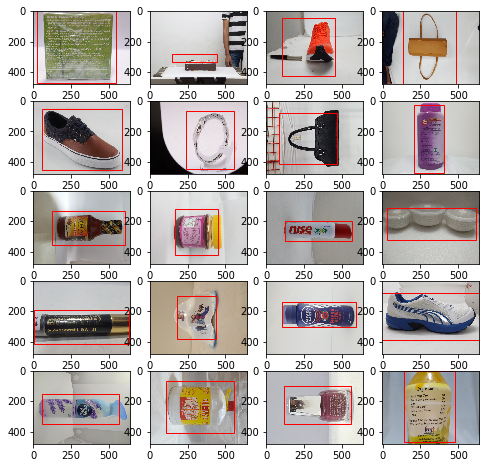

In [310]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1+31,31+ columns * rows + 1):
    img = plt.imread("images/"+output['image_name'][i-1])
    ax = fig.add_subplot(rows, columns, i-31)
    rect = patches.Rectangle((output.iloc[i-1, 1], output.iloc[i-1, 3]), output.iloc[i-1, 2]-output.iloc[i-1, 1], output.iloc[i-1, 4]-output.iloc[i-1, 3], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.imshow(img)
plt.show()